In [1]:
import logging; logging.basicConfig()
import itertools

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import tensorflow as tf

from netsci.models.random import erdos_renyi
import netsci.metrics.motifs as nsm


tqdm.pandas()
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-08-17 12:42:47.589507: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 12:42:48.663073: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  4


In [2]:
import time

class Timer:
    def __init__(self, logger=None, desc='Execution'):
        self.logger = logger
        self.desc = desc

    def __enter__(self):
        self.start = time.time_ns()
        return self

    def __exit__(self, *args):
        self.end = time.time_ns()
        self.interval = (self.end - self.start)
        self.interval_ms = self.interval // 1_000_000

        if self.logger is not None:
            self.logger(f'{self.desc} took {self.interval_ms/1000:.03f} sec.')

In [8]:
A = np.array(
[[0,0,0,0,0,0,0],
[1,0,1,0,0,0,0],
[0,0,0,1,0,0,0],
[0,0,0,0,0,0,0],
[0,0,0,0,0,1,1],
[0,0,0,0,0,0,1],
[0,0,0,0,0,0,0]])

In [10]:
# A = erdos_renyi(n=1000, p=0.01, random_state=71070)

logging.getLogger('netsci.metrics.motifs_gpu').setLevel(logging.DEBUG)
with tf.device('/CPU:0'):
    print(nsm.motifs(A, algorithm='louzoun',participation=True))

with tf.device('/GPU:0'):
    print(nsm.motifs(A, algorithm='louzoun',participation=True))

(array([-1, -1, -1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]), [[], [], [], [[2, 3, 1]], [], [[1, 2, 0]], [[4, 5, 6]], [], [], [], [], [], [], [], [], []])
(array([-1, -1, -1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]), [[], [], [], [[2, 3, 1]], [], [[1, 2, 0]], [[4, 5, 6]], [], [], [], [], [], [], [], [], []])


In [16]:
frequency,participation = nsm.motifs(A, algorithm='louzoun',participation=True)

In [17]:
frequency

array([-1, -1, -1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [13]:
import netsci.visualization as nsv

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<Axes: >, <Axes: >]

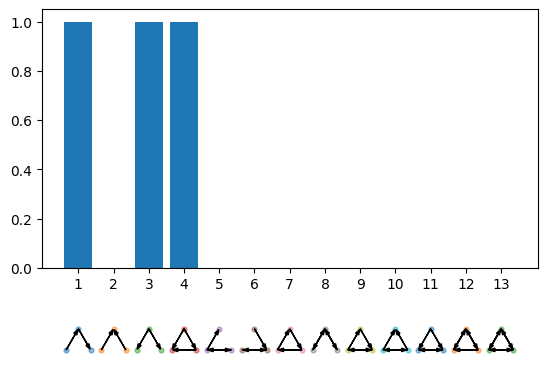

In [18]:
nsv.bar_motifs(frequency)

In [6]:
with Timer(logger=print, desc='GPU') as t:
    with tf.device('/GPU:0'):
        print(nsm.motifs(A, algorithm='gpu'))
print(t.interval_ms)

[156453141   9481653     37283     95997     47667     48287      1001
       843       769       334         2         9         5         9
         0         0]
GPU took 0.741 sec.
741
